In [ ]:
import pandas as pd
from tqdm.auto import tqdm

# Load the datasets
file_paths = ['gender_submission.csv', 'test.csv', 'train.csv']
dataframes = {}

# Read the files into pandas dataframes
for file_path in tqdm(file_paths, desc='Loading Data'):
    dataframes[file_path] = pd.read_csv(file_path)

# Display the head of each dataframe
for file_path, df in dataframes.items():
    print(f'Head of {file_path}:')
    print(df.head())
    print('\n')

Loading Data:   0%|          | 0/3 [00:00<?, ?it/s]

Head of gender_submission.csv:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


Head of test.csv:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  1

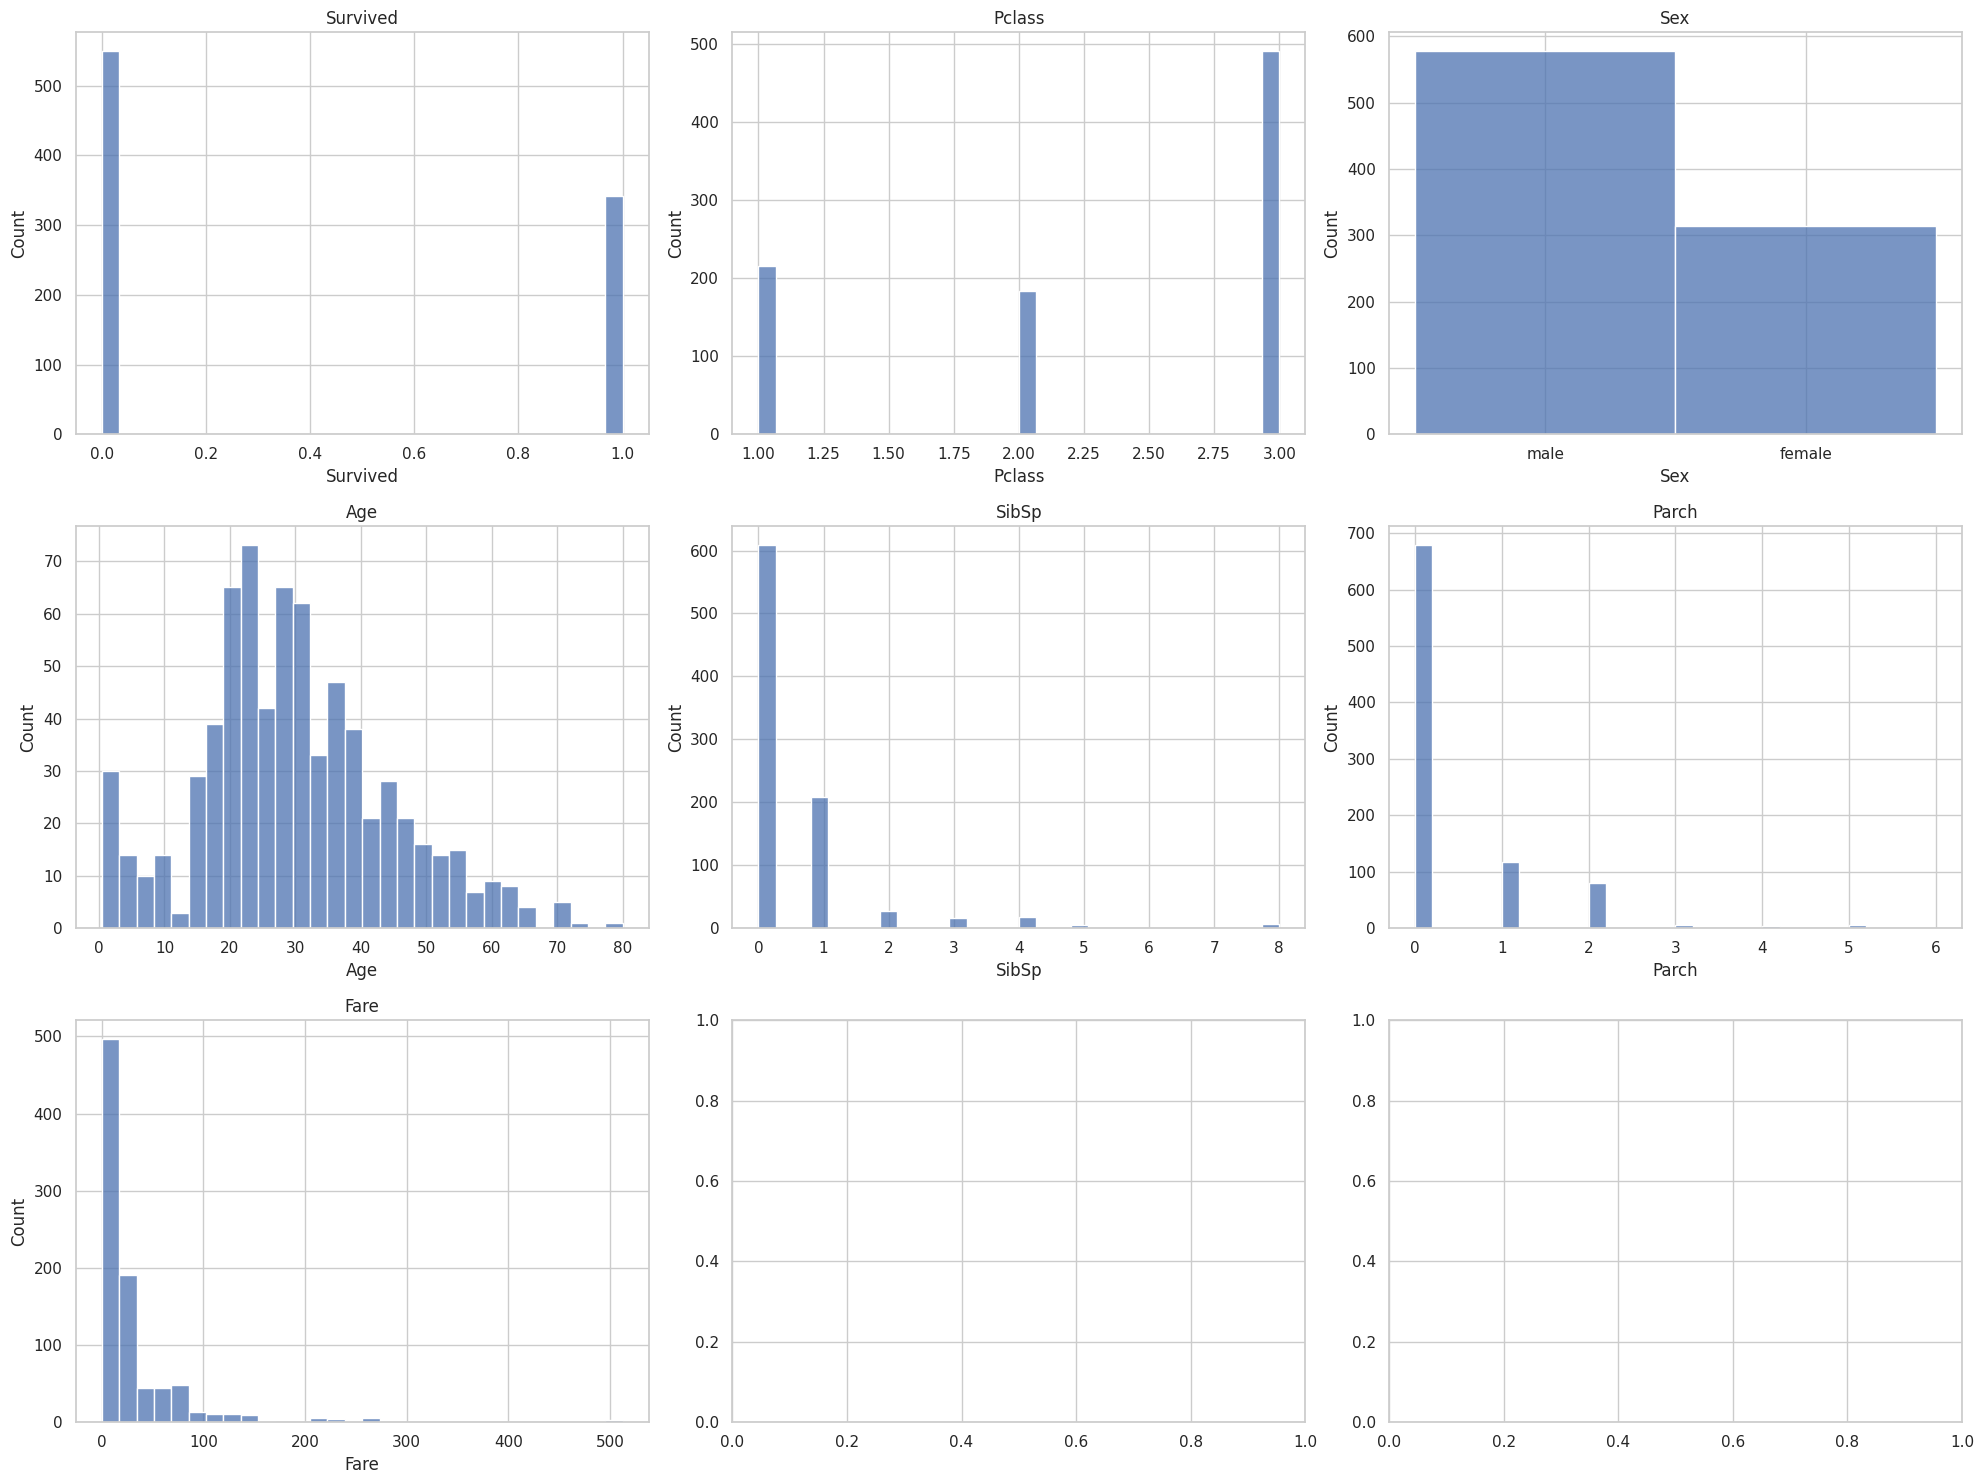

Missing values in gender_submission.csv:
PassengerId    0
Survived       0
dtype: int64


Missing values in test.csv:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Missing values in train.csv:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualisation settings
sns.set(style='whitegrid')

# Define a function to create histograms for features
def plot_histograms(df, features, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(20, 15))
    ax = ax.flatten() # to convert a matrix of axes to a vector
    for i, feature in enumerate(features):
        sns.histplot(df[feature], bins=30, ax=ax[i], kde=False)
        ax[i].set_title(feature)
    plt.tight_layout()
    plt.show()

# Plot histograms for the train dataset
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
plot_histograms(dataframes['train.csv'], features, 3, 3)

# Check for missing values in the datasets
for file_path, df in dataframes.items():
    print(f'Missing values in {file_path}:')
    print(df.isnull().sum())
    print('\n')

<ipython-input-3-cab6a1c51b95>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


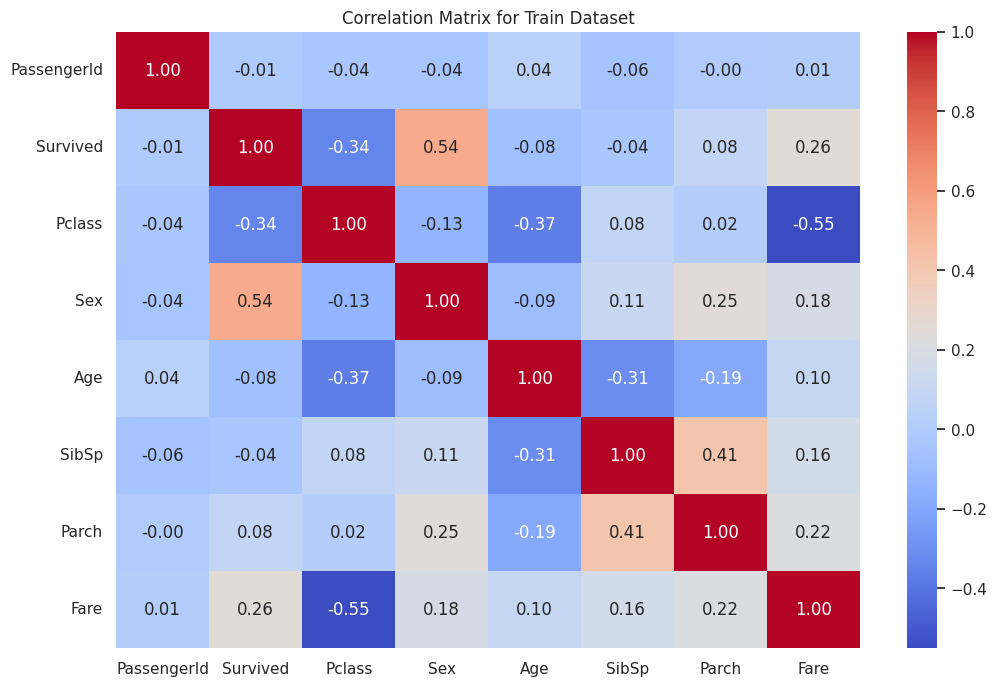

Correlation matrix:
             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.369226  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.093254  0.114631   
Age             0.036847 -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare 

In [ ]:
# Correlation analysis for the train dataset
train_df = dataframes['train.csv']

# Convert 'Sex' to a numerical variable where male: 0, female: 1
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Train Dataset')
plt.show()

# Display the correlation matrix
print('Correlation matrix:')
print(correlation_matrix)

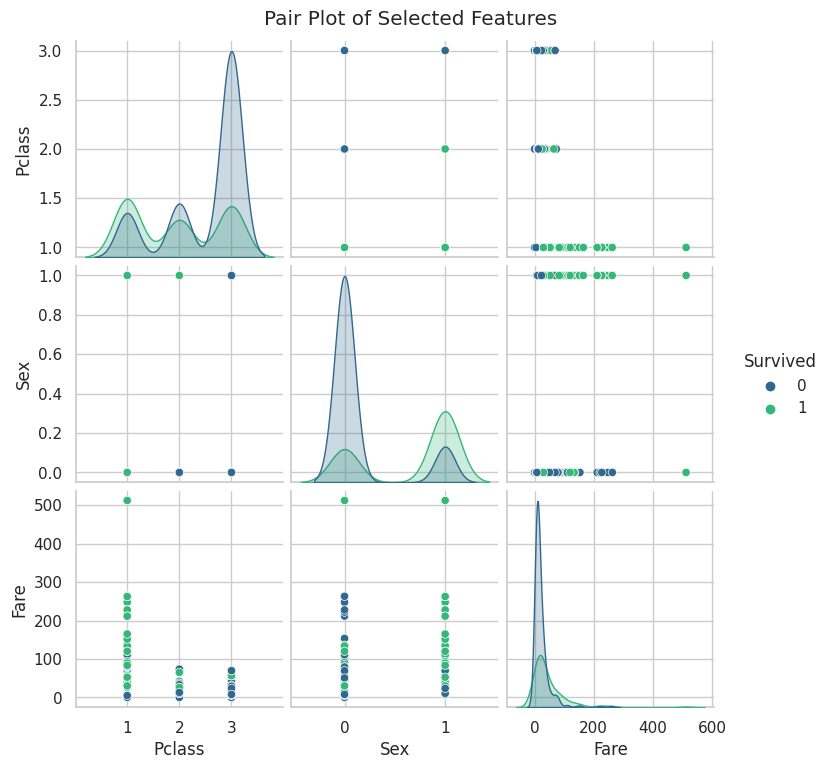

In [ ]:
# Further analysis of variable interactions
# We will create pair plots for the most correlated variables

# Selecting the most correlated variables for pair plot visualization
selected_features = ['Survived', 'Pclass', 'Sex', 'Fare']

# Creating pair plots
sns.pairplot(train_df[selected_features], hue='Survived', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02) # Adjust title position
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values
# For 'Age' and 'Fare', we'll use median imputation
# For 'Embarked', we'll use the mode

# Create imputers
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute 'Age' and 'Fare'
train_df['Age'] = median_imputer.fit_transform(train_df[['Age']])
train_df['Fare'] = median_imputer.fit_transform(train_df[['Fare']])

# Impute 'Embarked'
train_df['Embarked'] = mode_imputer.fit_transform(train_df[['Embarked']])

# Check if there are any missing values left
missing_values_after_imputation = train_df.isnull().sum()

# Display the missing values after imputation
print('Missing values after imputation:')
print(missing_values_after_imputation)

# Now let's create a new feature 'FamilySize' which is a sum of 'SibSp' and 'Parch' + 1 (for the passenger themselves)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Display the head of the dataframe to show the new feature
print('\nHead of the dataframe with the new feature FamilySize:')
print(train_df.head())

Missing values after imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Head of the dataframe with the new feature FamilySize:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William H

Survival rates by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Survival rates by gender:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


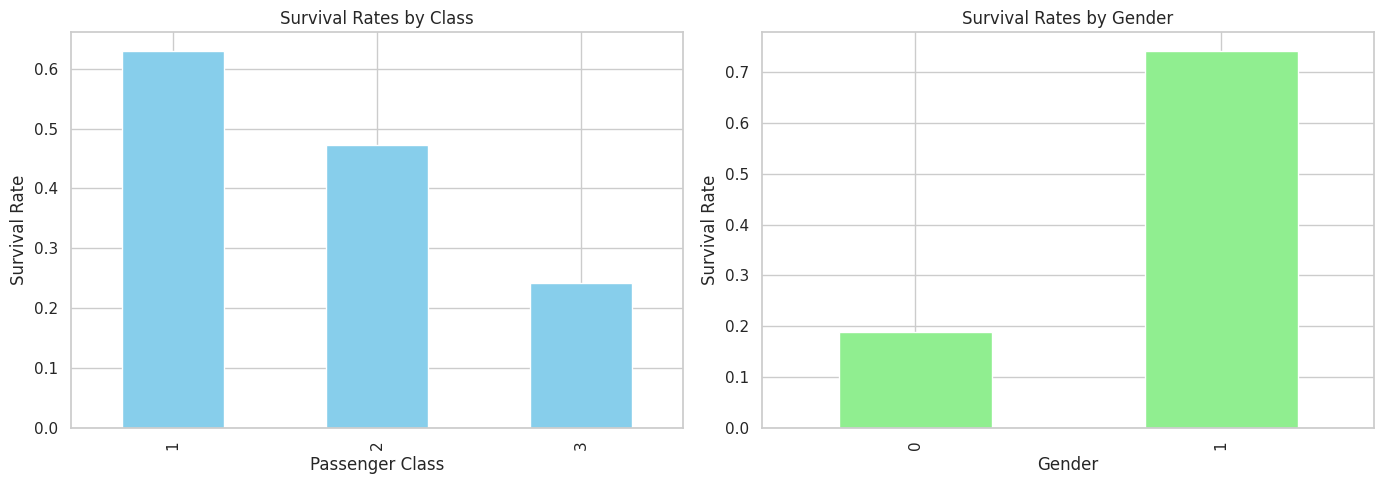

In [ ]:
# Analyzing survival rates by passenger classes and genders

# Calculate survival rates by class
survival_by_class = train_df.groupby('Pclass')['Survived'].mean()

# Calculate survival rates by gender
survival_by_gender = train_df.groupby('Sex')['Survived'].mean()

# Display the survival rates by class
print('Survival rates by class:')
print(survival_by_class)
print('\n')

# Display the survival rates by gender
print('Survival rates by gender:')
print(survival_by_gender)

# Visualize the survival rates by class and gender
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
survival_by_class.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Survival Rates by Class')
axes[0].set_ylabel('Survival Rate')
axes[0].set_xlabel('Passenger Class')

survival_by_gender.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Survival Rates by Gender')
axes[1].set_ylabel('Survival Rate')
axes[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()